In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_log = pd.read_csv("SRP073813_log.csv")
df_meta = pd.read_csv("SRP073813_meta.csv")

In [3]:
df_log.set_index("HUGO", inplace = True)
df_meta.set_index("ID", inplace = True)
df_meta = df_meta['refinebio_subject']

In [4]:
df_meta = df_meta.to_frame()

In [5]:
df_log =round(df_log)
df_log = df_log.T
df_log = df_log.join(df_meta)

In [6]:
df_log = df_log.loc[:, ~df_log.columns.duplicated()]

In [7]:
df_log = df_log[df_log["refinebio_subject"].str.contains('nacc')]
df_meta = df_meta[df_meta["refinebio_subject"].str.contains('nacc')]

In [8]:
df_log.drop("refinebio_subject", axis = 1, inplace = True)

In [9]:
dds = DeseqDataSet(counts =df_log,metadata = df_meta,design_factors ="refinebio_subject") 

C:\Users\Srikar\AppData\Local\Temp\ipykernel_11504\2207402584.py:1: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts =df_log,metadata = df_meta,design_factors ="refinebio_subject")
C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\pydeseq2\dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [10]:
dds.deseq2()

Fitting size factors...
... done in 0.26 seconds.

Fitting dispersions...
... done in 20.56 seconds.

Fitting dispersion trend curve...
... done in 6.67 seconds.

C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Fitting MAP dispersions...
... done in 80.42 seconds.

Fitting LFCs...
... done in 9.61 seconds.

Refitting 0 outliers.



In [11]:
dds

AnnData object with n_obs × n_vars = 114 × 29294
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [12]:
import scanpy as sc

In [13]:
dds

AnnData object with n_obs × n_vars = 114 × 29294
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [14]:
sc.tl.pca(dds)

C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


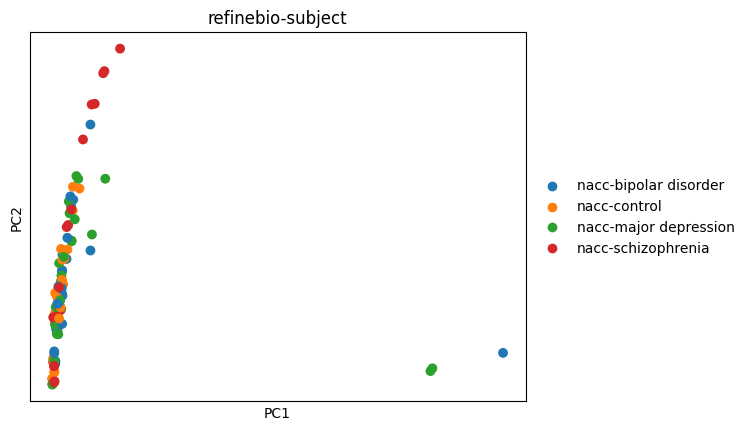

In [15]:
sc.pl.pca(dds, size = 200, color ='refinebio-subject')

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns

In [17]:
model = TSNE(learning_rate = 50)
tsne_features = model.fit_transform(df_log.to_numpy())

In [18]:
df_log['x'] = tsne_features[:,0]
df_log['y'] = tsne_features[:,1]
df_log =df_log.join(df_meta)

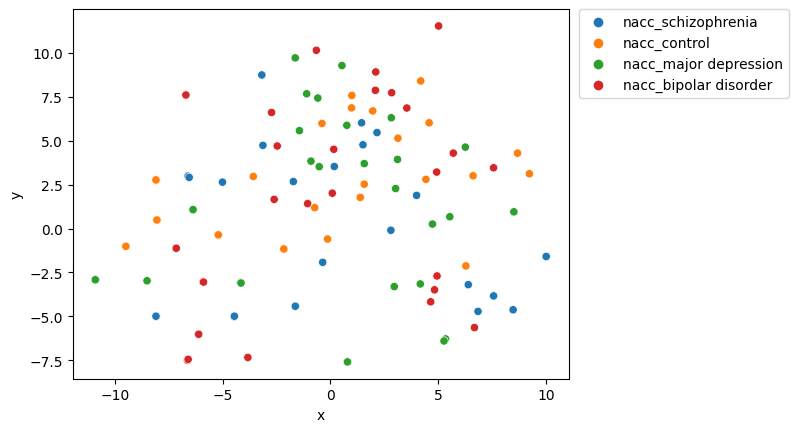

In [19]:
sns.scatterplot(x = 'x', y = 'y', hue = 'refinebio_subject', data=df_log)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [20]:
dds.layers['normed_counts']

array([[2.02446943, 1.01223472, 2.02446943, ..., 2.02446943, 1.01223472,
        3.03670415],
       [2.02446943, 1.01223472, 2.02446943, ..., 2.02446943, 1.01223472,
        2.02446943],
       [2.02446943, 1.01223472, 2.02446943, ..., 2.02446943, 1.01223472,
        2.02446943],
       ...,
       [2.02446943, 1.01223472, 2.02446943, ..., 2.02446943, 1.01223472,
        2.02446943],
       [2.02446943, 1.01223472, 2.02446943, ..., 2.02446943, 1.01223472,
        2.02446943],
       [2.02446943, 1.01223472, 2.02446943, ..., 2.02446943, 1.01223472,
        2.02446943]])

In [21]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [22]:
dds.layers['log1p']

array([[1.10673568, 0.6992459 , 1.10673568, ..., 1.10673568, 0.6992459 ,
        1.39542855],
       [1.10673568, 0.6992459 , 1.10673568, ..., 1.10673568, 0.6992459 ,
        1.10673568],
       [1.10673568, 0.6992459 , 1.10673568, ..., 1.10673568, 0.6992459 ,
        1.10673568],
       ...,
       [1.10673568, 0.6992459 , 1.10673568, ..., 1.10673568, 0.6992459 ,
        1.10673568],
       [1.10673568, 0.6992459 , 1.10673568, ..., 1.10673568, 0.6992459 ,
        1.10673568],
       [1.10673568, 0.6992459 , 1.10673568, ..., 1.10673568, 0.6992459 ,
        1.10673568]])

In [24]:
dds

AnnData object with n_obs × n_vars = 114 × 29294
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'refinebio-subject_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [25]:
grapher = pd.DataFrame(dds.layers['log1p'].T,index=dds.var_names, columns=dds.obs_names)

In [26]:
grapher

ID,SRR3438559,SRR3438560,SRR3438561,SRR3438562,SRR3438615,SRR3438616,SRR3438617,SRR3438618,SRR3438619,SRR3438620,...,SRR3438856,SRR3438863,SRR3438869,SRR3438891,SRR3438897,SRR3438899,SRR3438902,SRR3438903,SRR3438904,SRR3438905
TSPAN6,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.395429,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
TNMD,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,...,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246
DPM1,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
SCYL3,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
FIRRM,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NOTCH2NLC,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.395429,1.106736,1.106736
ARMCX5-GPRASP2,1.106736,1.106736,1.106736,1.106736,1.106736,0.699246,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
LOC112268419,1.106736,1.106736,1.106736,1.106736,1.106736,0.699246,0.699246,1.106736,1.106736,0.699246,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
LOC124903324,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,...,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246,0.699246


In [27]:
dds

AnnData object with n_obs × n_vars = 114 × 29294
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'refinebio-subject_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [28]:
df_meta

,refinebio_subject
ID,
SRR3438559,nacc_schizophrenia
SRR3438560,nacc_control
SRR3438561,nacc_control
SRR3438562,nacc_schizophrenia
SRR3438615,nacc_control
...,...
SRR3438899,nacc_major depression
SRR3438902,nacc_schizophrenia
SRR3438903,nacc_schizophrenia


In [29]:
dds.obs

,refinebio-subject
ID,
SRR3438559,nacc-schizophrenia
SRR3438560,nacc-control
SRR3438561,nacc-control
SRR3438562,nacc-schizophrenia
SRR3438615,nacc-control
...,...
SRR3438899,nacc-major depression
SRR3438902,nacc-schizophrenia
SRR3438903,nacc-schizophrenia


In [30]:
stat_res1 = DeseqStats(dds, contrast = ('refinebio-subject', 'nacc-schizophrenia', 'nacc-control'))

In [31]:
stat_res2 = DeseqStats(dds, contrast = ('refinebio-subject', 'nacc-major depression', 'nacc-control'))
stat_res3 = DeseqStats(dds, contrast = ('refinebio-subject', 'nacc-bipolar disorder', 'nacc-control'))

In [32]:
stat_res1.summary()
stat_res2.summary()
stat_res3.summary()

res1 = stat_res1.results_df
res2 = stat_res2.results_df
res3 = stat_res3.results_df

Running Wald tests...
... done in 3.25 seconds.



Log2 fold change & Wald test p-value: refinebio-subject nacc-schizophrenia vs nacc-control


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.023925,0.279246,-0.085676,0.931724,0.999947
TNMD,1.037365,-0.000026,0.400428,-0.000066,0.999947,0.999947
DPM1,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
SCYL3,2.040712,-0.000026,0.283145,-0.000093,0.999926,0.999947
FIRRM,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,-0.023925,0.279246,-0.085676,0.931724,0.999947
ARMCX5-GPRASP2,2.014075,0.026941,0.284427,0.094719,0.924538,0.999947
LOC112268419,1.916403,0.052111,0.291529,0.178751,0.858133,0.999947
LOC124903324,1.037365,-0.000026,0.400428,-0.000066,0.999947,0.999947


Running Wald tests...


Log2 fold change & Wald test p-value: refinebio-subject nacc-major depression vs nacc-control


... done in 3.26 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.009770,0.262113,-0.037272,0.970268,0.999155
TNMD,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155
DPM1,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
SCYL3,2.040712,0.042698,0.264726,0.161291,0.871864,0.999155
FIRRM,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,0.033299,0.260338,0.127908,0.898222,0.999155
ARMCX5-GPRASP2,2.014075,0.025271,0.267941,0.094315,0.924859,0.999155
LOC112268419,1.916403,0.040072,0.275224,0.145599,0.884238,0.999155
LOC124903324,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155


Running Wald tests...


Log2 fold change & Wald test p-value: refinebio-subject nacc-bipolar disorder vs nacc-control


... done in 3.26 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.029461,0.268061,-0.109902,0.912487,0.999556
TNMD,1.037365,0.023007,0.382710,0.060116,0.952063,0.999556
DPM1,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
SCYL3,2.040712,-0.001241,0.271701,-0.004566,0.996357,0.999556
FIRRM,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,-0.053708,0.269156,-0.199543,0.841838,0.999556
ARMCX5-GPRASP2,2.014075,0.025726,0.273036,0.094223,0.924932,0.999556
LOC112268419,1.916403,0.034503,0.280704,0.122914,0.902175,0.999556
LOC124903324,1.037365,0.023007,0.382710,0.060116,0.952063,0.999556


In [33]:
res1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.023925,0.279246,-0.085676,0.931724,0.999947
TNMD,1.037365,-0.000026,0.400428,-0.000066,0.999947,0.999947
DPM1,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
SCYL3,2.040712,-0.000026,0.283145,-0.000093,0.999926,0.999947
FIRRM,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,-0.023925,0.279246,-0.085676,0.931724,0.999947
ARMCX5-GPRASP2,2.014075,0.026941,0.284427,0.094719,0.924538,0.999947
LOC112268419,1.916403,0.052111,0.291529,0.178751,0.858133,0.999947
LOC124903324,1.037365,-0.000026,0.400428,-0.000066,0.999947,0.999947


In [34]:
res2

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.009770,0.262113,-0.037272,0.970268,0.999155
TNMD,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155
DPM1,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
SCYL3,2.040712,0.042698,0.264726,0.161291,0.871864,0.999155
FIRRM,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,0.033299,0.260338,0.127908,0.898222,0.999155
ARMCX5-GPRASP2,2.014075,0.025271,0.267941,0.094315,0.924859,0.999155
LOC112268419,1.916403,0.040072,0.275224,0.145599,0.884238,0.999155
LOC124903324,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155


In [35]:
res3

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.029461,0.268061,-0.109902,0.912487,0.999556
TNMD,1.037365,0.023007,0.382710,0.060116,0.952063,0.999556
DPM1,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
SCYL3,2.040712,-0.001241,0.271701,-0.004566,0.996357,0.999556
FIRRM,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,-0.053708,0.269156,-0.199543,0.841838,0.999556
ARMCX5-GPRASP2,2.014075,0.025726,0.273036,0.094223,0.924932,0.999556
LOC112268419,1.916403,0.034503,0.280704,0.122914,0.902175,0.999556
LOC124903324,1.037365,0.023007,0.382710,0.060116,0.952063,0.999556


In [37]:
res1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj


In [38]:
res2

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.009770,0.262113,-0.037272,0.970268,0.999155
TNMD,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155
DPM1,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
SCYL3,2.040712,0.042698,0.264726,0.161291,0.871864,0.999155
FIRRM,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,0.033299,0.260338,0.127908,0.898222,0.999155
ARMCX5-GPRASP2,2.014075,0.025271,0.267941,0.094315,0.924859,0.999155
LOC112268419,1.916403,0.040072,0.275224,0.145599,0.884238,0.999155
LOC124903324,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155


In [39]:
res1 = stat_res1.results_df

In [40]:
res1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.023925,0.279246,-0.085676,0.931724,0.999947
TNMD,1.037365,-0.000026,0.400428,-0.000066,0.999947,0.999947
DPM1,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
SCYL3,2.040712,-0.000026,0.283145,-0.000093,0.999926,0.999947
FIRRM,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,-0.023925,0.279246,-0.085676,0.931724,0.999947
ARMCX5-GPRASP2,2.014075,0.026941,0.284427,0.094719,0.924538,0.999947
LOC112268419,1.916403,0.052111,0.291529,0.178751,0.858133,0.999947
LOC124903324,1.037365,-0.000026,0.400428,-0.000066,0.999947,0.999947


In [44]:
res1.baseMean.mean()

1.9973816237088495

In [45]:
res1.padj.mean()

0.9999474227517189

In [46]:
res1.log2FoldChange.mean()

-0.00017862379045064676

In [47]:
res2.baseMean.mean()

1.9973816237088495

In [48]:
res2.padj.mean()

0.9991552462673055

In [49]:
res2.log2FoldChange.mean()

0.024170757981440957

In [50]:
res3.baseMean.mean()

1.9973816237088495

In [51]:
res3.padj.mean()

0.9995561978853236

In [52]:
res3.log2FoldChange.mean()

0.008633092123328434

In [54]:
res1 = res1[res1.baseMean >= res1.baseMean.mean()]

In [55]:
res1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.023925,0.279246,-0.085676,0.931724,0.999947
DPM1,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
SCYL3,2.040712,-0.000026,0.283145,-0.000093,0.999926,0.999947
FIRRM,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
FGR,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
...,...,...,...,...,...,...
LOC105372401,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
LOC728392,3.834305,-0.036337,0.206368,-0.176078,0.860233,0.999947
NOTCH2NLC,2.085109,-0.023925,0.279246,-0.085676,0.931724,0.999947
ARMCX5-GPRASP2,2.014075,0.026941,0.284427,0.094719,0.924538,0.999947


In [56]:
abs(res1.log2FoldChange)

TSPAN6            0.023925
DPM1              0.000026
SCYL3             0.000026
FIRRM             0.000026
FGR               0.000026
                    ...   
LOC105372401      0.000026
LOC728392         0.036337
NOTCH2NLC         0.023925
ARMCX5-GPRASP2    0.026941
LOC114841035      0.063699
Name: log2FoldChange, Length: 15662, dtype: float64

In [57]:
res1.log2FoldChange

TSPAN6           -0.023925
DPM1             -0.000026
SCYL3            -0.000026
FIRRM            -0.000026
FGR              -0.000026
                    ...   
LOC105372401     -0.000026
LOC728392        -0.036337
NOTCH2NLC        -0.023925
ARMCX5-GPRASP2    0.026941
LOC114841035      0.063699
Name: log2FoldChange, Length: 15662, dtype: float64

In [63]:
res2 = res2[res2.baseMean >= res2.baseMean.mean()]

In [64]:
res3 = res3[res3.baseMean >= res3.baseMean.mean()]

In [65]:
res1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.023925,0.279246,-0.085676,0.931724,0.999947
DPM1,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
SCYL3,2.040712,-0.000026,0.283145,-0.000093,0.999926,0.999947
FIRRM,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
FGR,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
...,...,...,...,...,...,...
LOC105372401,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
LOC728392,3.834305,-0.036337,0.206368,-0.176078,0.860233,0.999947
NOTCH2NLC,2.085109,-0.023925,0.279246,-0.085676,0.931724,0.999947
ARMCX5-GPRASP2,2.014075,0.026941,0.284427,0.094719,0.924538,0.999947


In [66]:
res2

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.009770,0.262113,-0.037272,0.970268,0.999155
DPM1,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
SCYL3,2.040712,0.042698,0.264726,0.161291,0.871864,0.999155
FIRRM,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
FGR,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
...,...,...,...,...,...,...
LOC105372401,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
LOC728392,3.834305,-0.026419,0.193784,-0.136331,0.891560,0.999155
NOTCH2NLC,2.085109,0.033299,0.260338,0.127908,0.898222,0.999155
ARMCX5-GPRASP2,2.014075,0.025271,0.267941,0.094315,0.924859,0.999155


In [67]:
res3

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.029461,0.268061,-0.109902,0.912487,0.999556
DPM1,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
SCYL3,2.040712,-0.001241,0.271701,-0.004566,0.996357,0.999556
FIRRM,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
FGR,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
...,...,...,...,...,...,...
LOC105372401,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
LOC728392,3.834305,0.029993,0.195720,0.153246,0.878204,0.999556
NOTCH2NLC,2.085109,-0.053708,0.269156,-0.199543,0.841838,0.999556
ARMCX5-GPRASP2,2.014075,0.025726,0.273036,0.094223,0.924932,0.999556


In [75]:
sigs1 = res1[ abs(res1.log2FoldChange) > abs(res1.log2FoldChange).mean()]

In [82]:
sigs1.padj.mean()

0.9999474227517188

In [121]:
dds.var_names

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'FIRRM', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'RNVU1-8', 'FAM246B', 'LOC105372401', 'LOC728392', 'CPLANE1-AS1',
       'NOTCH2NLC', 'ARMCX5-GPRASP2', 'LOC112268419', 'LOC124903324',
       'LOC114841035'],
      dtype='object', length=29294)

In [130]:
dds.obs

,refinebio-subject
ID,
SRR3438559,nacc-schizophrenia
SRR3438560,nacc-control
SRR3438561,nacc-control
SRR3438562,nacc-schizophrenia
SRR3438615,nacc-control
...,...
SRR3438899,nacc-major depression
SRR3438902,nacc-schizophrenia
SRR3438903,nacc-schizophrenia


In [144]:
group1 = dds.obs_names[(dds.obs['refinebio-subject'][dds.obs_names] == 'nacc-control') | (dds.obs['refinebio-subject'][dds.obs_names] == 'nacc-schizophrenia')]

In [145]:
group1

Index(['SRR3438559', 'SRR3438560', 'SRR3438561', 'SRR3438562', 'SRR3438615',
       'SRR3438616', 'SRR3438617', 'SRR3438618', 'SRR3438619', 'SRR3438620',
       'SRR3438621', 'SRR3438622', 'SRR3438623', 'SRR3438624', 'SRR3438639',
       'SRR3438640', 'SRR3438649', 'SRR3438650', 'SRR3438651', 'SRR3438652',
       'SRR3438657', 'SRR3438658', 'SRR3438661', 'SRR3438664', 'SRR3438672',
       'SRR3438673', 'SRR3438674', 'SRR3438737', 'SRR3438738', 'SRR3438740',
       'SRR3438761', 'SRR3438779', 'SRR3438785', 'SRR3438786', 'SRR3438795',
       'SRR3438796', 'SRR3438797', 'SRR3438807', 'SRR3438808', 'SRR3438810',
       'SRR3438819', 'SRR3438820', 'SRR3438841', 'SRR3438842', 'SRR3438852',
       'SRR3438856', 'SRR3438891', 'SRR3438897', 'SRR3438902', 'SRR3438903',
       'SRR3438904', 'SRR3438905'],
      dtype='object', name='ID')

In [146]:
group2 = dds.obs_names[(dds.obs['refinebio-subject'][dds.obs_names] == 'nacc-control') | (dds.obs['refinebio-subject'][dds.obs_names] == 'nacc-major depression')]

In [147]:
group3 = dds.obs_names[(dds.obs['refinebio-subject'][dds.obs_names] == 'nacc-control') | (dds.obs['refinebio-subject'][dds.obs_names] == 'nacc-bipolar disorder')]

In [148]:
group2

Index(['SRR3438560', 'SRR3438561', 'SRR3438615', 'SRR3438616', 'SRR3438617',
       'SRR3438618', 'SRR3438619', 'SRR3438620', 'SRR3438621', 'SRR3438622',
       'SRR3438623', 'SRR3438624', 'SRR3438625', 'SRR3438626', 'SRR3438637',
       'SRR3438638', 'SRR3438641', 'SRR3438642', 'SRR3438645', 'SRR3438646',
       'SRR3438647', 'SRR3438648', 'SRR3438661', 'SRR3438672', 'SRR3438673',
       'SRR3438683', 'SRR3438684', 'SRR3438685', 'SRR3438686', 'SRR3438687',
       'SRR3438688', 'SRR3438689', 'SRR3438690', 'SRR3438705', 'SRR3438706',
       'SRR3438709', 'SRR3438710', 'SRR3438725', 'SRR3438737', 'SRR3438738',
       'SRR3438750', 'SRR3438752', 'SRR3438771', 'SRR3438779', 'SRR3438783',
       'SRR3438784', 'SRR3438785', 'SRR3438795', 'SRR3438797', 'SRR3438807',
       'SRR3438808', 'SRR3438810', 'SRR3438821', 'SRR3438831', 'SRR3438852',
       'SRR3438856', 'SRR3438863', 'SRR3438897', 'SRR3438899'],
      dtype='object', name='ID')

In [149]:
group3

Index(['SRR3438560', 'SRR3438561', 'SRR3438615', 'SRR3438616', 'SRR3438617',
       'SRR3438618', 'SRR3438619', 'SRR3438620', 'SRR3438621', 'SRR3438622',
       'SRR3438623', 'SRR3438624', 'SRR3438635', 'SRR3438636', 'SRR3438643',
       'SRR3438644', 'SRR3438653', 'SRR3438654', 'SRR3438655', 'SRR3438656',
       'SRR3438659', 'SRR3438660', 'SRR3438661', 'SRR3438662', 'SRR3438672',
       'SRR3438673', 'SRR3438707', 'SRR3438708', 'SRR3438711', 'SRR3438712',
       'SRR3438723', 'SRR3438724', 'SRR3438726', 'SRR3438737', 'SRR3438738',
       'SRR3438739', 'SRR3438749', 'SRR3438751', 'SRR3438772', 'SRR3438773',
       'SRR3438774', 'SRR3438779', 'SRR3438785', 'SRR3438795', 'SRR3438797',
       'SRR3438798', 'SRR3438807', 'SRR3438808', 'SRR3438809', 'SRR3438810',
       'SRR3438822', 'SRR3438832', 'SRR3438851', 'SRR3438852', 'SRR3438856',
       'SRR3438869', 'SRR3438897'],
      dtype='object', name='ID')

In [150]:
dds_sigs1 = dds[group1,sigs1.index]

In [160]:
dds.obs

,refinebio-subject
ID,
SRR3438559,nacc-schizophrenia
SRR3438560,nacc-control
SRR3438561,nacc-control
SRR3438562,nacc-schizophrenia
SRR3438615,nacc-control
...,...
SRR3438899,nacc-major depression
SRR3438902,nacc-schizophrenia
SRR3438903,nacc-schizophrenia


In [163]:
map1 = [dds.obs['refinebio-subject'][id]+"_"+id for id in group1]
map1

['nacc-schizophrenia_SRR3438559',
 'nacc-control_SRR3438560',
 'nacc-control_SRR3438561',
 'nacc-schizophrenia_SRR3438562',
 'nacc-control_SRR3438615',
 'nacc-control_SRR3438616',
 'nacc-control_SRR3438617',
 'nacc-control_SRR3438618',
 'nacc-control_SRR3438619',
 'nacc-control_SRR3438620',
 'nacc-control_SRR3438621',
 'nacc-control_SRR3438622',
 'nacc-control_SRR3438623',
 'nacc-control_SRR3438624',
 'nacc-schizophrenia_SRR3438639',
 'nacc-schizophrenia_SRR3438640',
 'nacc-schizophrenia_SRR3438649',
 'nacc-schizophrenia_SRR3438650',
 'nacc-schizophrenia_SRR3438651',
 'nacc-schizophrenia_SRR3438652',
 'nacc-schizophrenia_SRR3438657',
 'nacc-schizophrenia_SRR3438658',
 'nacc-control_SRR3438661',
 'nacc-schizophrenia_SRR3438664',
 'nacc-control_SRR3438672',
 'nacc-control_SRR3438673',
 'nacc-schizophrenia_SRR3438674',
 'nacc-control_SRR3438737',
 'nacc-control_SRR3438738',
 'nacc-schizophrenia_SRR3438740',
 'nacc-schizophrenia_SRR3438761',
 'nacc-control_SRR3438779',
 'nacc-control_SRR34

In [165]:
grapher1 = pd.DataFrame(dds_sigs1.layers['log1p'].T, index=dds_sigs1.var_names, columns = map1)

In [166]:
grapher1

,nacc-schizophrenia_SRR3438559,nacc-control_SRR3438560,nacc-control_SRR3438561,nacc-schizophrenia_SRR3438562,nacc-control_SRR3438615,nacc-control_SRR3438616,nacc-control_SRR3438617,nacc-control_SRR3438618,nacc-control_SRR3438619,nacc-control_SRR3438620,...,nacc-schizophrenia_SRR3438841,nacc-schizophrenia_SRR3438842,nacc-control_SRR3438852,nacc-control_SRR3438856,nacc-schizophrenia_SRR3438891,nacc-control_SRR3438897,nacc-schizophrenia_SRR3438902,nacc-schizophrenia_SRR3438903,nacc-schizophrenia_SRR3438904,nacc-schizophrenia_SRR3438905
CFH,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.395429,1.106736,1.395429,1.395429
NFYA,1.106736,1.395429,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.395429,1.106736,1.395429,1.106736,1.106736,1.106736,1.106736,1.106736
NIPAL3,1.801903,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,...,1.801903,1.619178,1.801903,1.619178,1.956342,1.619178,1.801903,1.619178,1.801903,1.801903
ENPP4,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,...,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.106736,1.395429
SEMA3F,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.395429,1.395429,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCF12-DT,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.395429,1.106736,1.106736,1.395429,1.395429,1.106736
POLR2J3,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,...,1.395429,1.395429,1.395429,1.395429,1.619178,1.395429,1.619178,1.619178,1.619178,1.395429
NIPBL-DT,1.395429,1.395429,1.395429,1.395429,1.106736,1.106736,1.395429,1.395429,1.395429,1.395429,...,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429
ZIM2-AS1,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,...,1.619178,1.619178,1.395429,1.619178,1.619178,1.619178,1.619178,1.801903,1.801903,1.619178


C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


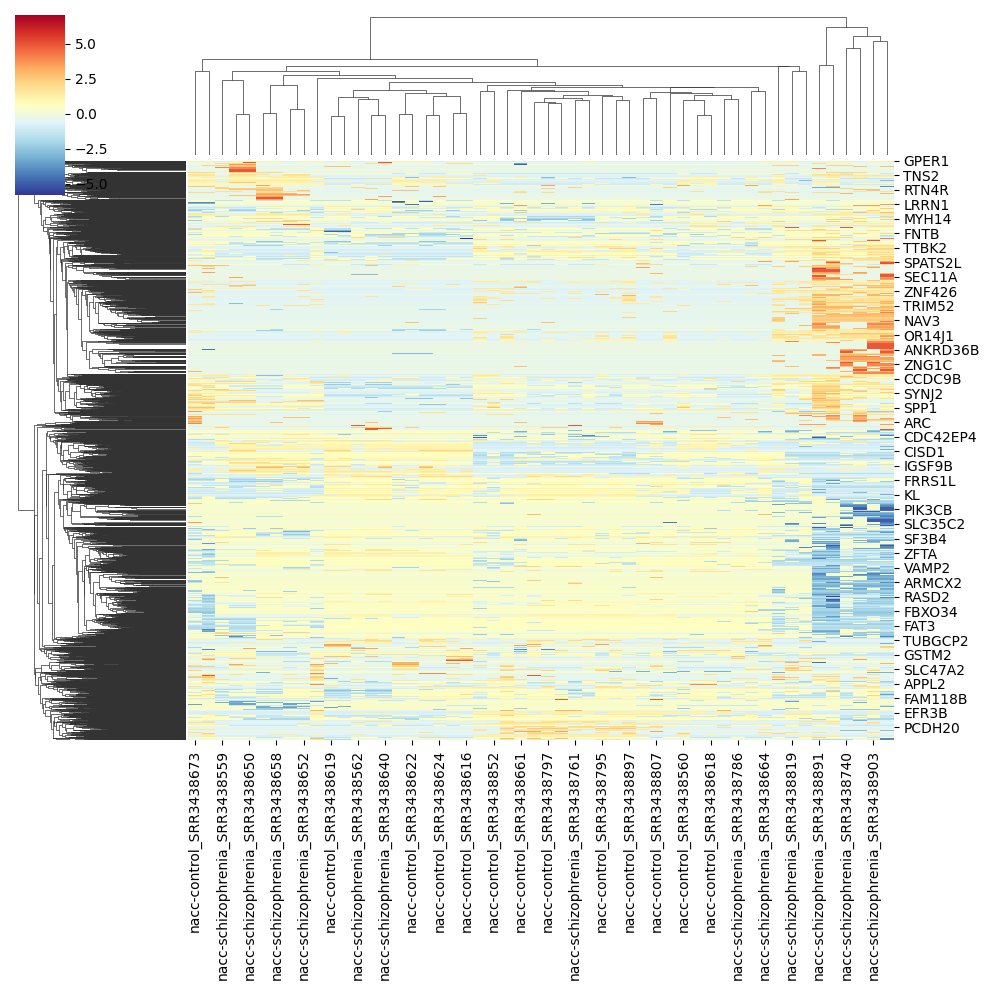

In [167]:
sns.clustermap(grapher1, z_score=0, cmap='RdYlBu_r')

In [168]:
sigs2 = res2[ abs(res2.log2FoldChange) > abs(res2.log2FoldChange).mean()]

In [170]:
sigs3 = res3[abs(res3.log2FoldChange) > abs(res3.log2FoldChange).mean()]

In [171]:
sigs2

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SCYL3,2.040712,0.042698,0.264726,0.161291,0.871864,0.999155
GCLC,2.999663,-0.047500,0.219263,-0.216635,0.828493,0.999155
NFYA,2.253810,-0.051258,0.250770,-0.204402,0.838039,0.999155
NIPAL3,4.240217,-0.054164,0.186666,-0.290163,0.771692,0.999155
ENPP4,2.884233,-0.094806,0.220958,-0.429067,0.667874,0.999155
...,...,...,...,...,...,...
UPK3BL2,2.173901,-0.035305,0.260866,-0.135336,0.892346,0.999155
GABPB1-IT1,2.138384,-0.038701,0.258749,-0.149568,0.881105,0.999155
POLR2J3,3.079581,0.049323,0.218641,0.225591,0.821520,0.999155
LOC389906,2.135855,0.085767,0.262968,0.326148,0.744312,0.999155


In [172]:
sigs3

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
NFYA,2.253810,-0.038798,0.255159,-0.152055,0.879143,0.999556
STPG1,2.138380,0.040929,0.264962,0.154470,0.877239,0.999556
ENPP4,2.884233,-0.146918,0.227405,-0.646064,0.518238,0.999556
SEMA3F,2.262694,-0.038798,0.255159,-0.152055,0.879143,0.999556
CYP51A1,2.946388,-0.076529,0.224664,-0.340636,0.733378,0.999556
...,...,...,...,...,...,...
LOC389906,2.135855,0.116116,0.266581,0.435577,0.663144,0.999556
NIPBL-DT,2.777690,-0.035887,0.231881,-0.154764,0.877007,0.999556
ZIM2-AS1,3.804299,0.156406,0.198672,0.787259,0.431130,0.999556
NOTCH2NLC,2.085109,-0.053708,0.269156,-0.199543,0.841838,0.999556


In [173]:
dds_sigs2 = dds[group2,sigs2.index]
dds_sigs3 = dds[group3,sigs3.index]

In [174]:
dds_sigs2

View of AnnData object with n_obs × n_vars = 59 × 5950
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'refinebio-subject_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [175]:
dds_sigs3

View of AnnData object with n_obs × n_vars = 57 × 5307
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'refinebio-subject_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [176]:
map2 = [dds.obs['refinebio-subject'][id]+"_"+id for id in group2]
map3 = [dds.obs['refinebio-subject'][id]+"_"+id for id in group3]

In [177]:
map2

['nacc-control_SRR3438560',
 'nacc-control_SRR3438561',
 'nacc-control_SRR3438615',
 'nacc-control_SRR3438616',
 'nacc-control_SRR3438617',
 'nacc-control_SRR3438618',
 'nacc-control_SRR3438619',
 'nacc-control_SRR3438620',
 'nacc-control_SRR3438621',
 'nacc-control_SRR3438622',
 'nacc-control_SRR3438623',
 'nacc-control_SRR3438624',
 'nacc-major depression_SRR3438625',
 'nacc-major depression_SRR3438626',
 'nacc-major depression_SRR3438637',
 'nacc-major depression_SRR3438638',
 'nacc-major depression_SRR3438641',
 'nacc-major depression_SRR3438642',
 'nacc-major depression_SRR3438645',
 'nacc-major depression_SRR3438646',
 'nacc-major depression_SRR3438647',
 'nacc-major depression_SRR3438648',
 'nacc-control_SRR3438661',
 'nacc-control_SRR3438672',
 'nacc-control_SRR3438673',
 'nacc-major depression_SRR3438683',
 'nacc-major depression_SRR3438684',
 'nacc-major depression_SRR3438685',
 'nacc-major depression_SRR3438686',
 'nacc-major depression_SRR3438687',
 'nacc-major depression_S

In [178]:
grapher2 = pd.DataFrame(dds_sigs2.layers['log1p'].T, index=dds_sigs2.var_names, columns = map2)
grapher3 = pd.DataFrame(dds_sigs3.layers['log1p'].T, index=dds_sigs3.var_names, columns = map3)

In [179]:
grapher2

,nacc-control_SRR3438560,nacc-control_SRR3438561,nacc-control_SRR3438615,nacc-control_SRR3438616,nacc-control_SRR3438617,nacc-control_SRR3438618,nacc-control_SRR3438619,nacc-control_SRR3438620,nacc-control_SRR3438621,nacc-control_SRR3438622,...,nacc-control_SRR3438807,nacc-control_SRR3438808,nacc-control_SRR3438810,nacc-major depression_SRR3438821,nacc-major depression_SRR3438831,nacc-control_SRR3438852,nacc-control_SRR3438856,nacc-major depression_SRR3438863,nacc-control_SRR3438897,nacc-major depression_SRR3438899
SCYL3,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
GCLC,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,...,1.395429,1.395429,1.395429,1.106736,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429
NFYA,1.395429,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.395429,1.106736,1.106736,1.395429,1.106736,1.106736,1.106736,1.106736
NIPAL3,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,...,1.619178,1.619178,1.619178,1.619178,1.619178,1.801903,1.619178,1.619178,1.619178,1.619178
ENPP4,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,...,1.395429,1.395429,1.395429,1.106736,1.395429,1.395429,1.395429,1.106736,1.395429,1.395429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UPK3BL2,1.395429,1.106736,1.106736,1.106736,1.106736,1.106736,1.395429,1.395429,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
GABPB1-IT1,1.106736,1.106736,1.106736,1.395429,1.106736,1.106736,1.395429,1.395429,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
POLR2J3,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,...,1.395429,1.106736,1.106736,1.619178,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429
LOC389906,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736


In [180]:
grapher3

,nacc-control_SRR3438560,nacc-control_SRR3438561,nacc-control_SRR3438615,nacc-control_SRR3438616,nacc-control_SRR3438617,nacc-control_SRR3438618,nacc-control_SRR3438619,nacc-control_SRR3438620,nacc-control_SRR3438621,nacc-control_SRR3438622,...,nacc-control_SRR3438808,nacc-bipolar disorder_SRR3438809,nacc-control_SRR3438810,nacc-bipolar disorder_SRR3438822,nacc-bipolar disorder_SRR3438832,nacc-bipolar disorder_SRR3438851,nacc-control_SRR3438852,nacc-control_SRR3438856,nacc-bipolar disorder_SRR3438869,nacc-control_SRR3438897
NFYA,1.395429,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.395429,1.395429,1.106736,1.106736,1.395429,1.395429,1.106736,1.106736,1.106736
STPG1,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.395429,...,1.106736,1.106736,1.106736,1.106736,1.395429,1.106736,1.106736,1.106736,1.106736,1.106736
ENPP4,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,...,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.106736,1.395429
SEMA3F,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.395429,1.395429,1.395429,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.395429,1.106736,1.106736,1.106736,1.106736,1.106736
CYP51A1,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,...,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.106736,1.395429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC389906,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736
NIPBL-DT,1.395429,1.395429,1.106736,1.106736,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,...,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429,1.395429
ZIM2-AS1,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.619178,1.395429,1.395429,...,1.395429,1.395429,1.395429,1.619178,1.619178,1.395429,1.395429,1.619178,1.801903,1.619178
NOTCH2NLC,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.395429,...,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736,1.106736


C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


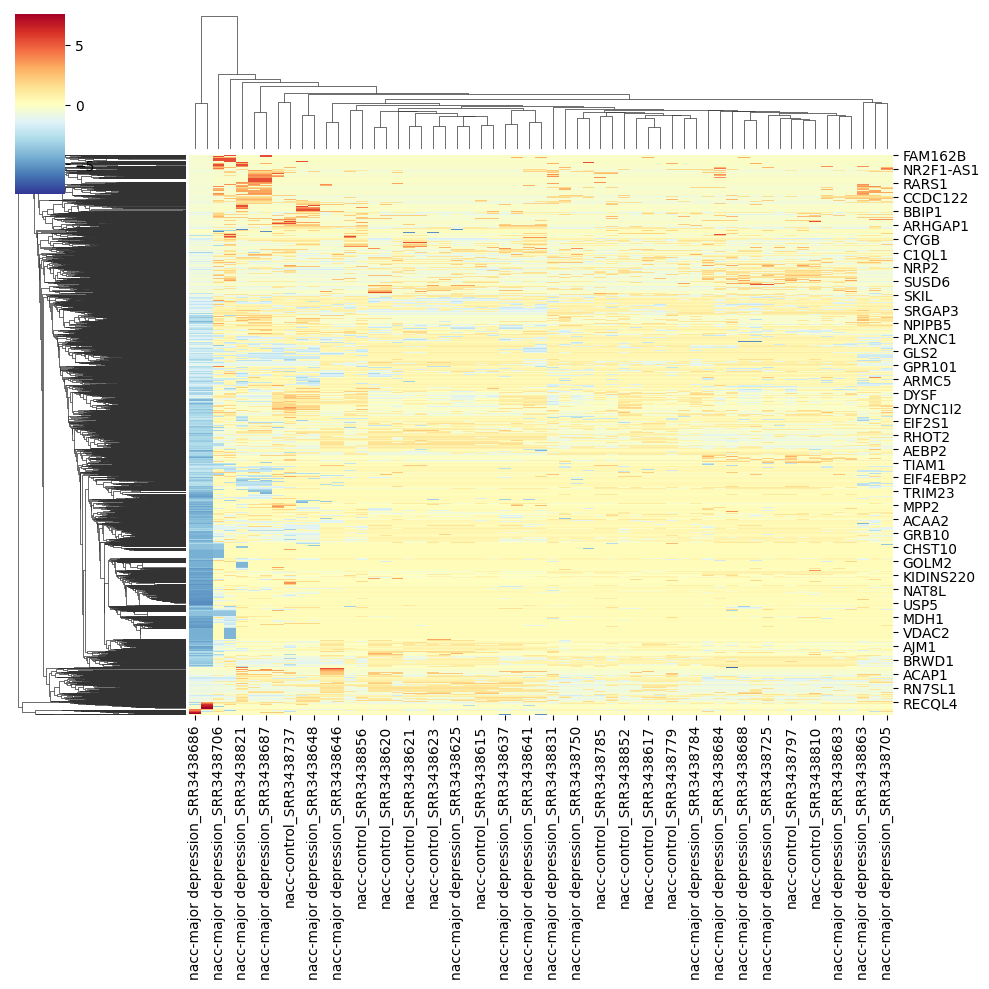

In [181]:
sns.clustermap(grapher2, z_score=0, cmap='RdYlBu_r')

C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Srikar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


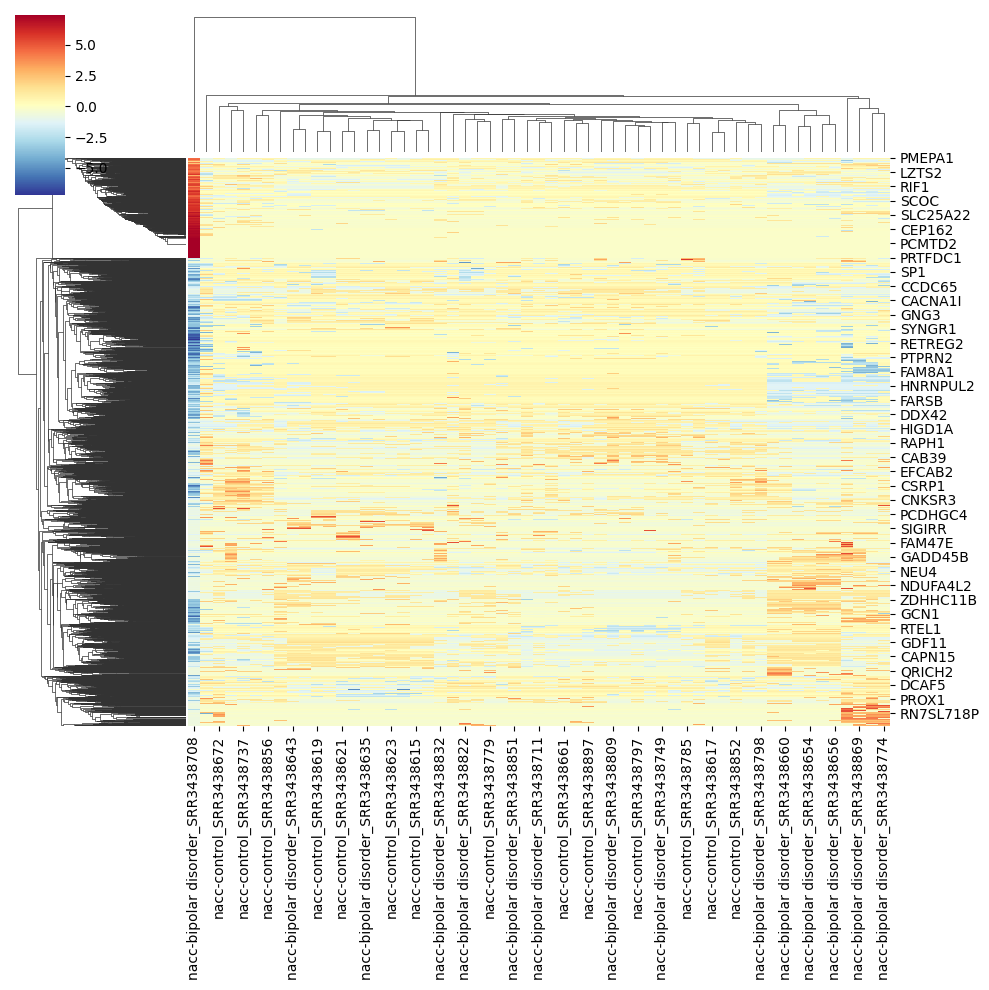

In [182]:
sns.clustermap(grapher3, z_score=0, cmap='RdYlBu_r')

In [ ]:
import rpy2